In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('complete.csv')

# Display the first few rows of the dataframe
print(df.head())

       ID               name                     full_name  \
0   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
1  158023           L. Messi                  Lionel Messi   
2  190871             Neymar    Neymar da Silva Santos Jr.   
3  176580          L. Suárez                   Luis Suárez   
4  167495           M. Neuer                  Manuel Neuer   

                  club                                club_logo  special  age  \
0       Real Madrid CF  https://cdn.sofifa.org/18/teams/243.png     2228   32   
1         FC Barcelona  https://cdn.sofifa.org/18/teams/241.png     2158   30   
2  Paris Saint-Germain   https://cdn.sofifa.org/18/teams/73.png     2100   25   
3         FC Barcelona  https://cdn.sofifa.org/18/teams/241.png     2291   30   
4     FC Bayern Munich   https://cdn.sofifa.org/18/teams/21.png     1493   31   

                     league  birth_date  height_cm  ...  prefers_cb  \
0  Spanish Primera División  1985-02-05      185.0  ...       False  

In [3]:
# Select relevant columns
columns_of_interest = ['ID', 'full_name', 'potential', 'pac', 'sho', 'pas', 'dri', 'phy', 'international_reputation', 'skill_moves', 'weak_foot', 'overall']
df = df[columns_of_interest]

# Display the shape of the dataframe
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (17994, 12)


In [4]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(['ID'])
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Check for any remaining missing values
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 ID                          0
full_name                   0
potential                   0
pac                         0
sho                         0
pas                         0
dri                         0
phy                         0
international_reputation    0
skill_moves                 0
weak_foot                   0
overall                     0
dtype: int64


In [5]:
# Create target variable based on 'overall' ratings
def classify_overall(overall):
    if overall <= 59:
        return 'Low'
    elif 60 <= overall <= 74:
        return 'Medium'
    else:
        return 'High'

df['target'] = df['overall'].apply(classify_overall)

# Drop 'overall' column as it's no longer needed
df = df.drop(columns=['overall'])

print("Target variable created.")

Target variable created.


In [6]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()

# Store ID and full_name before scaling
ids = df_scaled['ID']
full_names = df_scaled['full_name']

# recalculate numeric_cols
numeric_cols = df_scaled.select_dtypes(include=['float64', 'int64']).columns.drop(['ID'])
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)

# Add the 'target', 'ID', and 'full_name' columns back to the scaled dataframe
df_scaled['target'] = df['target']
df_scaled['ID'] = ids
df_scaled['full_name'] = full_names

# Display the first few rows of the scaled dataframe
print(df_scaled.head())

   potential       pac       sho       pas       dri       phy  \
0   3.748796  2.035232  2.856478  2.337819  2.641270  1.577350   
1   3.584372  1.943802  2.639611  2.719990  3.219467 -0.390070   
2   3.748796  2.218092  2.205878  2.051190  3.123101 -0.493619   
3   3.419949  1.303793  2.639611  2.051190  2.352172  1.680899   
4   3.419949  2.126662  2.639611  3.579874  2.544904  2.716383   

   international_reputation  skill_moves  weak_foot target      ID  \
0                  9.615085     3.594754   1.589912   High   20801   
1                  9.615085     2.254292   1.589912   High  158023   
2                  9.615085     3.594754   3.102568   High  190871   
3                  9.615085     2.254292   1.589912   High  176580   
4                  9.615085    -1.767095   1.589912   High  167495   

                      full_name  
0  C. Ronaldo dos Santos Aveiro  
1                  Lionel Messi  
2    Neymar da Silva Santos Jr.  
3                   Luis Suárez  
4           

In [7]:
# Save the modified dataset
df_scaled.to_csv('modified_dataset.csv', index=False)

print("Modified dataset saved as 'modified_dataset.csv'.")


Modified dataset saved as 'modified_dataset.csv'.


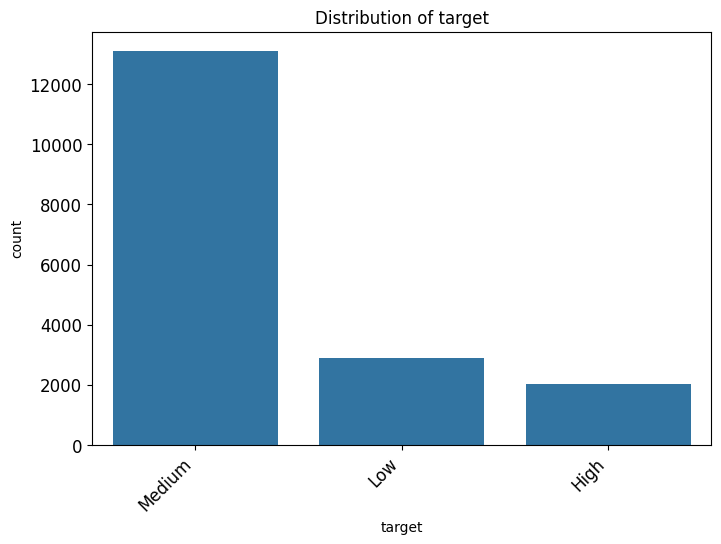

In [14]:
# Analyzing the distribution of categorical features using count plots
categorical_cols = df.select_dtypes(include=['object']).columns.drop('full_name', errors='ignore')

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    top_values = df[col].value_counts().nlargest(10).index  # Show only top 10 categories
    sns.countplot(data=df, x=col, order=top_values)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


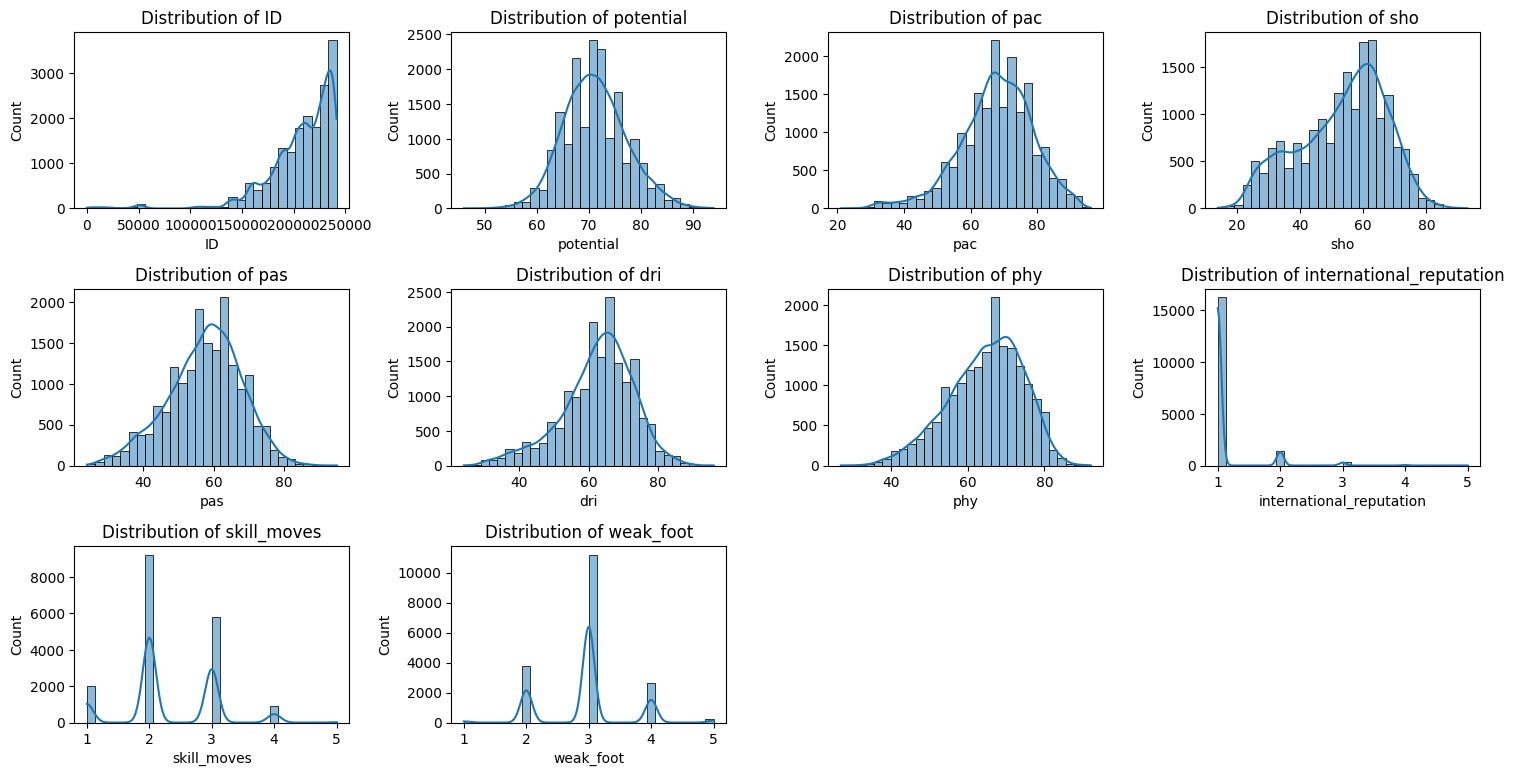

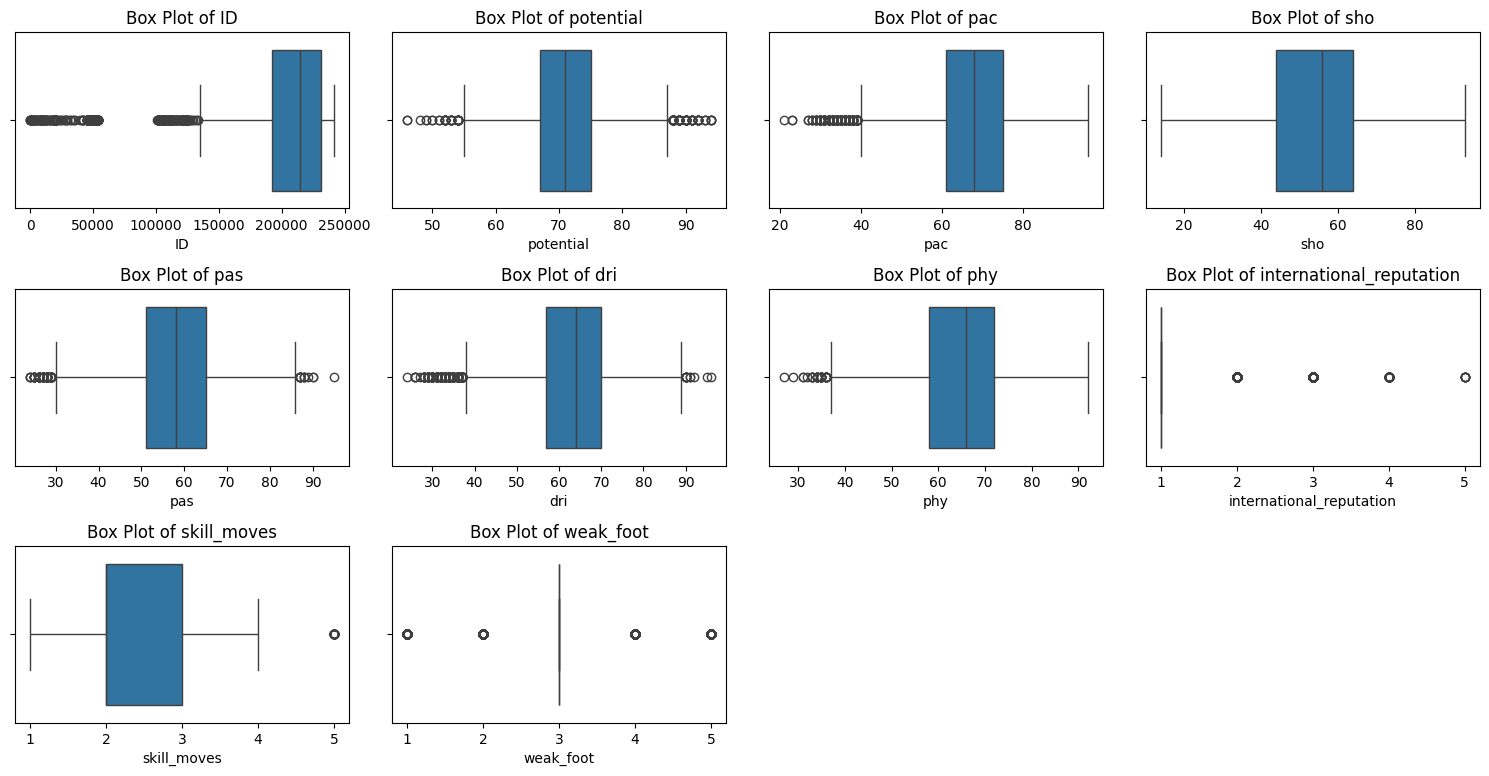

In [19]:
# Analyzing the distribution of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


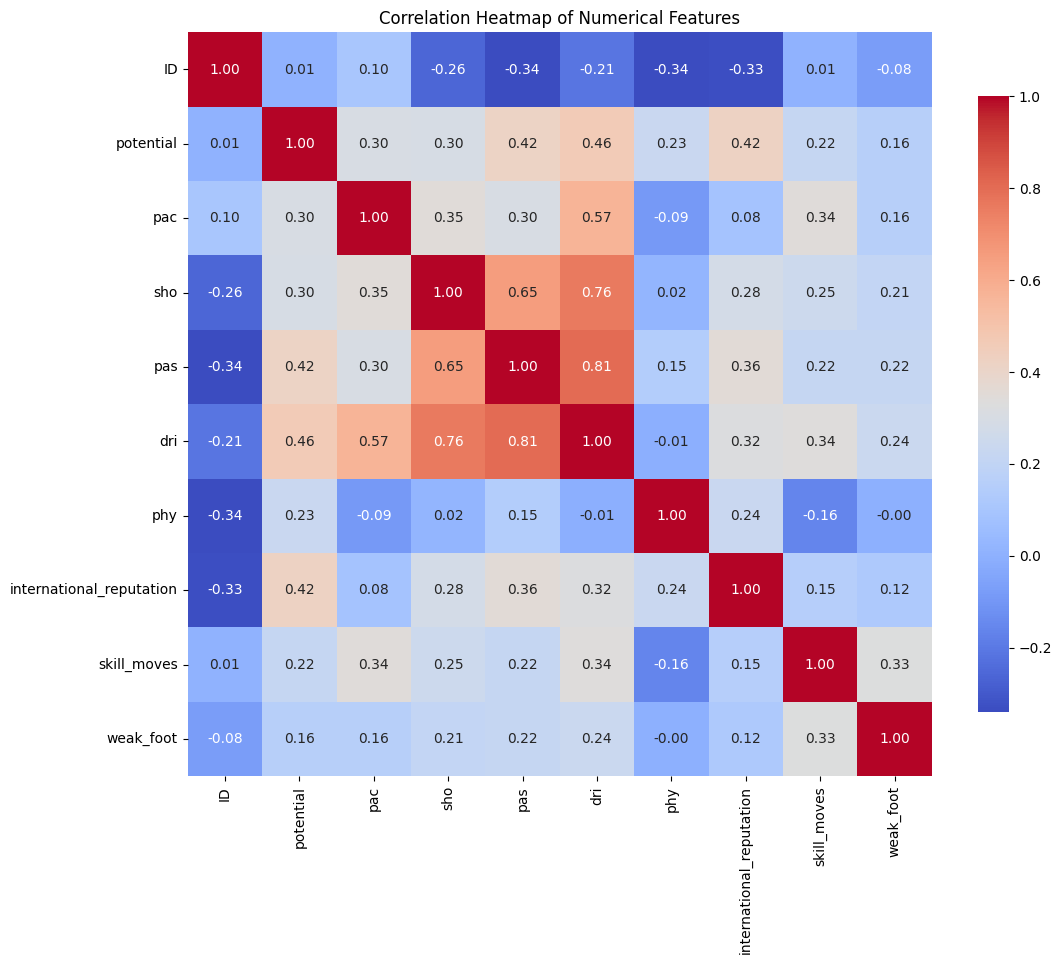

In [20]:
# Checking for correlations between numerical features using a heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



<ipython-input-27-a5620583bf65>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df_scaled.groupby('target').apply(lambda x: x.sample(df_scaled['target'].value_counts().min(), random_state=42)).reset_index(drop=True)


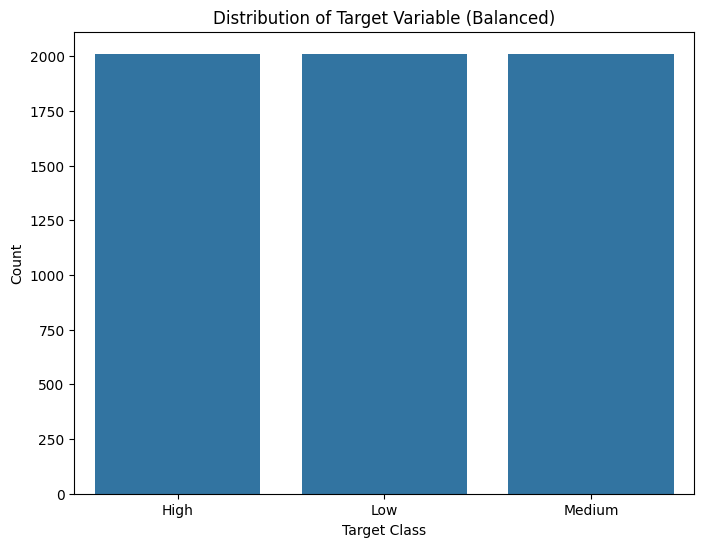

In [27]:
# Balance the dataset by sampling the minimum class size
balanced_df = df_scaled.groupby('target').apply(lambda x: x.sample(df_scaled['target'].value_counts().min(), random_state=42)).reset_index(drop=True)

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=balanced_df)
plt.title('Distribution of Target Variable (Balanced)')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()



In [30]:
# Prepare the features and target variable
X = df_scaled.drop(['target', 'ID', 'full_name'], axis=1)  # Exclude ID and full_name from model training
y = df_scaled['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10],
    'min_samples_split': [5],
    'min_samples_leaf': [4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best Score:  0.9205279610976034


In [31]:
# Use the best model from grid search
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)

# Display the final classification report
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

        High       0.93      0.86      0.89       391
         Low       0.86      0.76      0.80       576
      Medium       0.93      0.96      0.95      2632

    accuracy                           0.92      3599
   macro avg       0.90      0.86      0.88      3599
weighted avg       0.92      0.92      0.92      3599



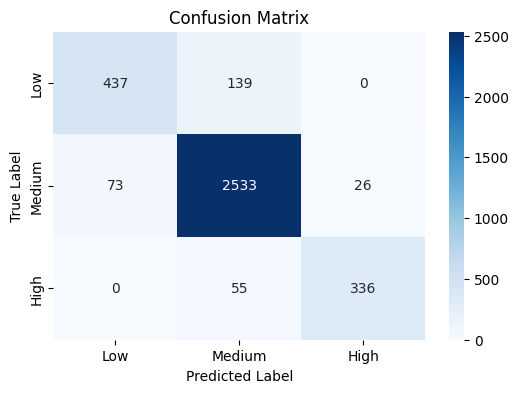

In [41]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best, labels=['Low', 'Medium', 'High'])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [42]:
# Calculate training and test accuracy
train_accuracy = best_rf.score(X_train, y_train)
test_accuracy = best_rf.score(X_test, y_test)
print("Training Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Training Accuracy:  0.9385897881208753
Test Accuracy:  0.9185884968046679


<ipython-input-43-8c3647ab7bb3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_indices], y=feature_names[sorted_indices], palette="viridis")


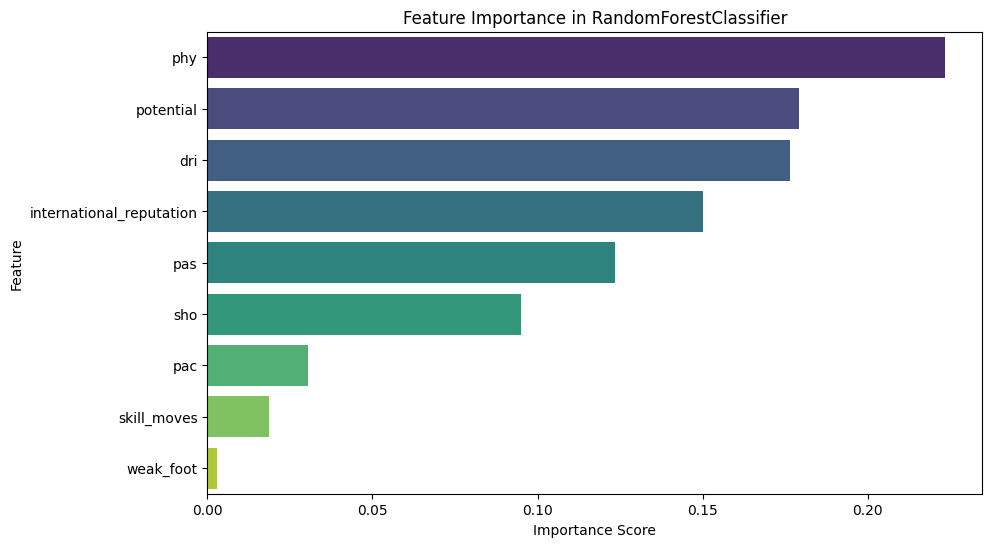

In [43]:
# Feature Importance Visualization
feature_importances = best_rf.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices], y=feature_names[sorted_indices], palette="viridis")
plt.title("Feature Importance in RandomForestClassifier")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [46]:
import pickle

with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(best_rf, file)


In [47]:
# Download the model
from google.colab import files
files.download('random_forest_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>